# Assignment: Implementing Gradient Descent and Stochastic Gradient Descent

## Understanding Different Types of Gradient Descent
### Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates the model parameters using only one randomly chosen data point per iteration. 

This makes it computationally efficient and allows it to escape local minima, but it can be noisy and less stable compared to other methods. 

The randomness in the updates introduces variance, which can sometimes help in finding a better solution, but may also slow down convergence or cause oscillations.

Mathematically, the update rule for SGD is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J_i(\theta) $$
where:
- $\theta$ represents the parameters
- $\alpha$ is the learning rate
- $\nabla J_i(\theta)$ is the gradient computed using a single data point $$ i $$


### Mini-Batch Gradient Descent
Mini-Batch Gradient Descent is a compromise between batch and stochastic gradient descent. Instead of using the entire dataset or a single data point, it updates the parameters using a small batch of randomly selected data points. This balances stability and efficiency, making it a commonly used approach in deep learning. Mini-batch gradient descent helps smooth out some of the noise of SGD while still being computationally efficient. The batch size is a hyperparameter that affects convergence speed and accuracy.

The update rule for mini-batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J_i(\theta) $$
where:
- $m$ is the mini-batch size
- $\sum_{i=1}^{m} \nabla J_i(\theta)$ represents the gradient computed over a batch of $m$ data points

### Batch Gradient Descent (Vanilla)
Batch Gradient Descent computes the gradient using the entire dataset at each iteration. 

While this method leads to a smooth convergence, it is computationally expensive, especially for large datasets. 

It tends to be more stable and can find the optimal solution efficiently, but it may take longer compared to SGD and Mini-Batch Gradient Descent.

The update rule for batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta) $$
where:
- $\nabla J(\theta)$ is the gradient computed over the entire dataset

## Task 1: Implement Gradient Descent for a Quadratic Function
1. Define a quadratic function, e.g., $$ f(x) = x^2 $$.
2. Implement a gradient descent to minimize this function.
3. Use different learning rates and visualize the convergence.
4. Plot the function and the gradient descent path.
5. Plot the evolution of loss across iterations

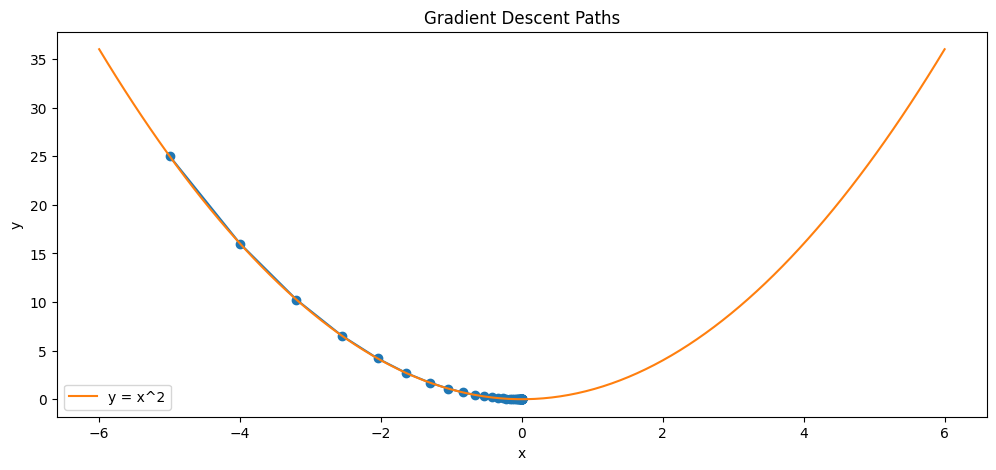

/var/folders/gv/1ydw07yj7pvc1skb391n8d_c0000gn/T/ipykernel_89623/1159639502.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


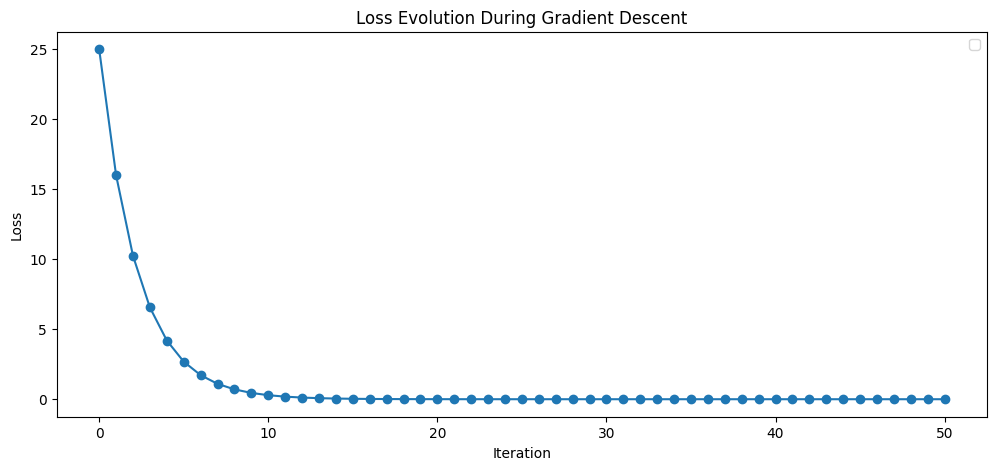

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.1

def quadratic_function(x):
    return x**2

def gradient(x):
    return 2*x

def gradient_descent(start_x, learning_rate, num_iterations):
    x = start_x
    history = [(x, quadratic_function(x))]  # gradient descent path
    losses = [quadratic_function(x)] # loss evolution path
    
    for _ in range(num_iterations):
        grad = gradient(x)
        x -= learning_rate * grad
        history.append((x, quadratic_function(x)))
        losses.append(quadratic_function(x))
    
    return history, losses

def plot_convergence(learning_rate, start_x=-5, num_iterations=50):
    x_vals = np.linspace(-6, 6, 100)
    y_vals = quadratic_function(x_vals)
    
    plt.figure(figsize=(12, 5))
    
    history, _ = gradient_descent(start_x, learning_rate, num_iterations)
    path_x, path_y = zip(*history)
    plt.plot(path_x, path_y, marker='o')
    
    plt.plot(x_vals, y_vals, label='y=x^2')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent Paths')
    plt.legend()
    plt.show()

def plot_loss_evolution(learning_rate, start_x=-5, num_iterations=50):
    plt.figure(figsize=(12, 5))
    
    
    _, losses = gradient_descent(start_x, learning_rate, num_iterations)
    plt.plot(losses, marker='o')
    
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Evolution During Gradient Descent')
    plt.legend()
    plt.show()



plot_convergence(learning_rate)
plot_loss_evolution(learning_rate)


## Task 2: Gradient Descent in Higher Dimensions
1. Define a function like $$ f(x, y) = x^2 + y^2 $$.
2. Implement gradient descent for two variables.
3. Visualize the contour plot and the optimization path.
4. Experiment with different initialization points and learning rates.

In [ ]:
learning_rate = 0.1
start_x = 4
start_y = 4


def function(x, y):
    return x**2 + y**2

def gradient(a):
    return 2*a

def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    x, y = start_x, start_y
    history = [(x, y)]

    for _ in range(num_iterations):
        gradient_x = gradient(x)
        gradient_y = gradient(y)

        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y

        history.append((x, y))

    return history

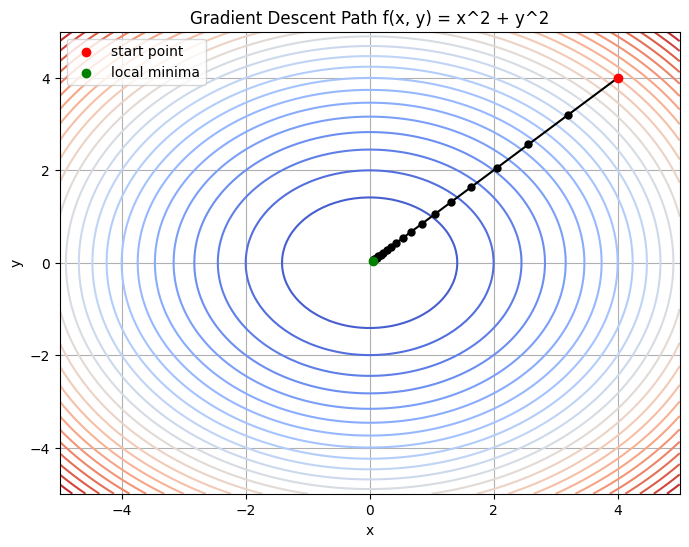

In [ ]:
def plot_path(history):
    x_vals = np.linspace(-5, 5, 100)
    y_vals = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = function(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=30, cmap="coolwarm")
    
    path_x, path_y = zip(*history)
    plt.plot(path_x, path_y, marker="o", color="black", linestyle="-", markersize=5)
    
    plt.scatter(path_x[0], path_y[0], color="red", label="start point", zorder=3)
    plt.scatter(path_x[-1], path_y[-1], color="green", label="local minima", zorder=3)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Gradient Descent Path f(x, y) = x^2 + y^2")
    plt.legend()
    plt.grid()
    plt.show()


history = gradient_descent(start_x, start_y, learning_rate, num_iterations=20)
plot_path(history)


## Task 3: Implement Stochastic Gradient Descent (SGD)
1. Generate a synthetic dataset : $$ y = 3x + 5 + \text{noise} $$.
2. Run gradient descent for linear regression.
3. Run stochastic gradient descent and compare results.
4. Plot the regression line and analyze the difference in convergence speed.

In [ ]:
np.random.seed(42)  
X = np.linspace(0, 10, 100)  
noise = np.random.normal(0, 2, X.shape) 
y = 3 * X + 5 + noise  

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [68]:
# Vanilla Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m, b = np.random.rand(), np.random.rand()  
    n = len(X)  
    history = []  
    
    for _ in range(num_iterations):
        y_pred = m * X + b
        grad_m = (-2/n) * np.sum(X * (y - y_pred))  # dMSE/dm
        grad_b = (-2/n) * np.sum(y - y_pred)  # dMSE/db

        m -= learning_rate * grad_m
        b -= learning_rate * grad_b
        history.append(mse(y, y_pred))
    
    return m, b, history

In [69]:
# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m, b = np.random.rand(), np.random.rand()
    n = len(X)
    history = []
    
    for _ in range(num_iterations):
        i = np.random.randint(n)  # random point
        xi, yi = X[i], y[i]
        y_pred = m * xi + b
        
        grad_m = -2 * xi * (yi - y_pred)
        grad_b = -2 * (yi - y_pred)

        m -= learning_rate * grad_m
        b -= learning_rate * grad_b
        history.append(mse(y, m * X + b))
    
    return m, b, history

In [ ]:
gd_m, gd_b, gd_history = gradient_descent(X, y)
sgd_m, sgd_b, sgd_history = stochastic_gradient_descent(X, y)

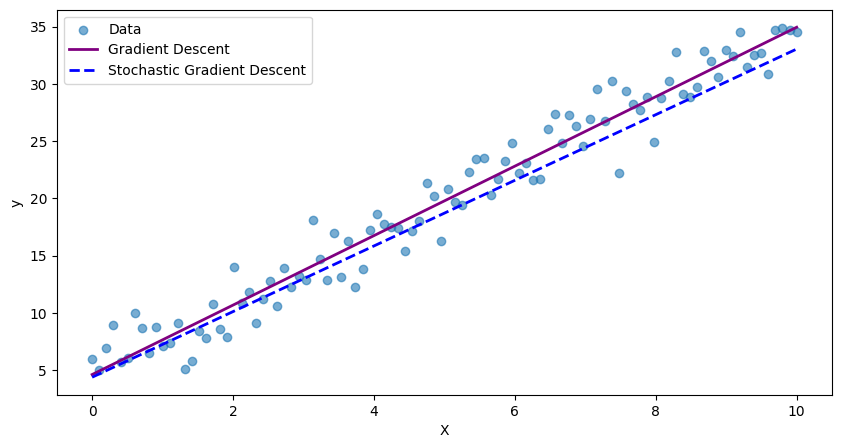

In [74]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X, gd_m * X + gd_b, label="Gradient Descent", color="purple", linewidth=2)
plt.plot(X, sgd_m * X + sgd_b, label="Stochastic Gradient Descent", color="blue", linewidth=2, linestyle="dashed")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


### Task 4
1. Define the multimodal function $$f(x, y) = (x^2 + y^2) * sin(x) * sin(y) + x^2 + y^2$$.
2. Visualize the 3D surface plot as well as the contour plot.
3. What could be a problem for convergence of the algorithm here ?
5. Run the gradient descent algorithm with different initial values and learning rates.
7. Add the optimization path to the contour plot for each initial value.
8. Compare the performance path of gradient descent and stochastic gradient descent for each initial value.



## SKlearn regressions library

- Take one dataset we already used for previous weeks. 
- Prepare data to train a model
- Fit a linear regression with OLS method
- Fit a linear regression with gradient descent (look at sklearn documentation to do so)
- Compare and explain the results

In [ ]:
# loading data
import pandas as pd


df = pd.read_csv("cars.csv").rename(columns={'cnt' : 'cnt_rental_bike'})
df = df.fillna(value=float(0))

In [ ]:
# preparing data to train
from sklearn.preprocessing import OneHotEncoder


df.drop('name', axis=1, inplace=True)

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

ohetransform = ohe.fit_transform(df[['fuel', 'seller_type', 'transmission', 'owner']])
ohetransform  = ohetransform.astype(int)

df = pd.concat([df, ohetransform], axis=1)

df = df.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1)

X = df[df.columns.difference(['selling_price'])]
y = df['selling_price']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104,test_size=0.25, shuffle=True)

In [ ]:
# Fit Linear Regression (OLS)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)

# Evaluate OLS Model
r2_ols = r2_score(y_test, y_pred_ols)

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import SGDRegressor


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Gradient Descent Model
gd_model = SGDRegressor(max_iter=2000, tol=1e-4, learning_rate='optimal', random_state=104, early_stopping=True)
gd_model.fit(X_train_scaled, y_train)
y_pred_gd = gd_model.predict(X_test_scaled)

# Evaluate Gradient Descent Model
r2_gd = r2_score(y_test, y_pred_gd)


/Users/personal/Desktop/introToML/env/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
print ('Comparison:')
print ('\tTrain R2: ' + "{:}".format(r2_ols))
print ('\tTest R2: ' + "{:}".format(r2_gd))

print('\nLinear regression with Gradient Descent performed worse.')

Comparison:
	Train R2: -0.011203189594120255
	Test R2: -6.723833898018328e+22

Linear regression with Gradient Descent performed worse.
